<a href="https://colab.research.google.com/github/cpvivek/Global-Terrorism-Database-EDA/blob/main/Rossmann_Sales_Prediction_Capstone_Project_Vivek_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#EDA
Let's start with loading up our datasets and exploring them.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We've got two datasets to work with:

Rossman Store data set, which is exclusive to Sales data regarding Rossman Stores.

And Stores Data; a supplemental dataset which takes into consideration the competitions around the stores as well. 

Let's load these two up.

In [4]:
#loading datasets
rossman_data=pd.read_csv('/content/drive/MyDrive/Alma Better Pro/Alma Better Pro Program/Module 4: Machine Learning/Data Sets/Copy of Rossmann Stores Data.csv')
store_data=pd.read_csv('/content/drive/MyDrive/Alma Better Pro/Alma Better Pro Program/Module 4: Machine Learning/Data Sets/Copy of store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's explore the Rossman store data


In [5]:
#Fields we have in hand.
rossman_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [7]:
rossman_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
rossman_data.shape

(1017209, 9)

In [6]:
rossman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


This dataset doesn't have any null values. Phew. 

In [9]:
#Statistical Summary
rossman_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Now let's see what the supplemental data holds


In [10]:
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [11]:
store_data.shape

(1115, 10)

In [12]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


We've got some null values to handle here

In [13]:
#Statistical Summary
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


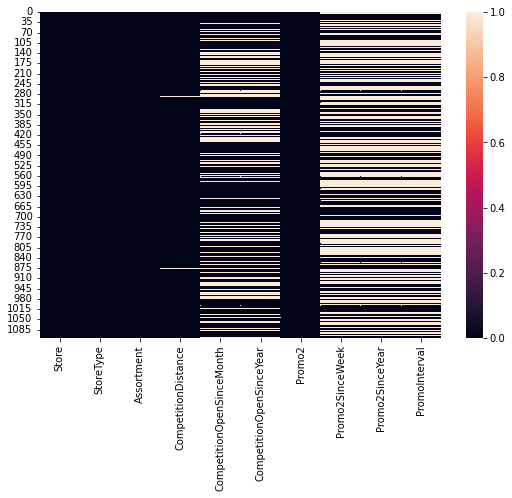

In [14]:
plt.figure(figsize=(9,6))
sns.heatmap(store_data.isnull())

In [15]:
#Competition Distance has 3 null values. They can be replaced by median competition distance, since fields like distances are prone to outliers.
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(),inplace=True)

#Competition since month has considerable amount of NaN values. It's safe to use mode value of duration to replace null values
store_data['CompetitionOpenSinceMonth'].fillna(int(store_data['CompetitionOpenSinceMonth'].mode()),inplace=True)

#Similarly for competition since year
store_data['CompetitionOpenSinceYear'].fillna(int(store_data['CompetitionOpenSinceYear'].mode()),inplace=True)


In [16]:
#The NaN values in PromoInterval, Promo2SinceYear, and Promo2SinceWeek can be replaced by 0 or 'None' depending on the dtype.

promos =['PromoInterval' , 'Promo2SinceYear', 'Promo2SinceWeek']
for col in promos:
   if store_data[col].dtype == np.object:
         store_data[col].fillna('None',inplace=True)
   else:
         store_data[col].fillna(0,inplace=True)

In [17]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Let's take a look a tour NaN value free dataset

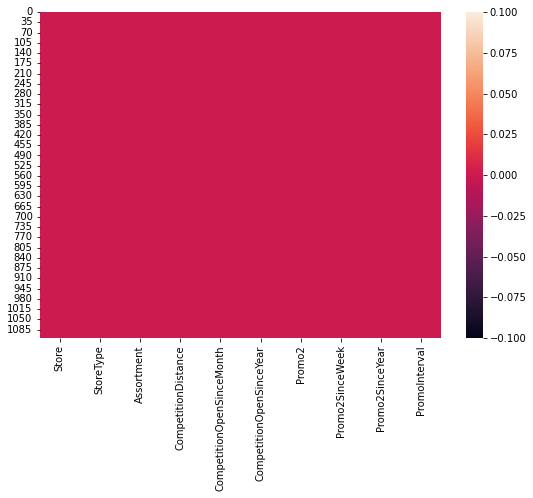

In [18]:
plt.figure(figsize=(9,6))
sns.heatmap(store_data.isna())

We've got rid of the NaN values.

Both the datasets have Store IDs as a common field. So we can merge these two on Store Id

In [19]:
dataset=pd.merge(rossman_data,store_data,on='Store')

In [20]:
print(f"Rossman DF shape: {rossman_data.shape}")
print(f"Store_data shape: {store_data.shape}")
print(f"Merged dataset shape: {dataset.shape}")

Rossman DF shape: (1017209, 9)
Store_data shape: (1115, 10)
Merged dataset shape: (1017209, 18)


The dataset has been merged succesfuly.
Let's look into it

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

No null values present

In [22]:
#Statistical Summary
dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


Let's dive deep into the data


In [23]:
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [24]:
#Let's look into the stores and there sales
store_sales_df=dataset.groupby('Store')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
store_sales_df

,Store,Sales
261,262,19516842
816,817,17057867
561,562,16927322
1113,1114,16202585
250,251,14896870
...,...,...
262,263,2306075
207,208,2302052
197,198,2268273
542,543,2179287


Store 262 is the one that has cumulatively made highest sales, summing up to 19516842.

Store 307 has had least cumulative sales of 2114322

In [25]:
#Before we do any timeline analysis, let's convert the date column to year, month and day.
dataset['Date']=pd.to_datetime(dataset['Date']) #This would change the date format from string to datetime type

#Now let's add Year, month and Day column
dataset['Year']=dataset['Date'].dt.year
dataset['Month']=dataset['Date'].dt.month
dataset['Day']=dataset['Date'].dt.day

Let's have a look at some timelines

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


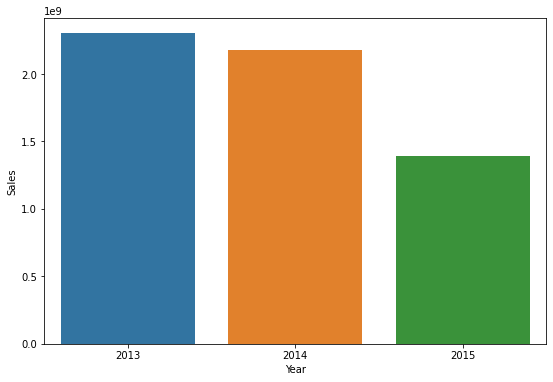

In [27]:
sale_year_timeline=dataset.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(9,6))
sns.barplot(sale_year_timeline.Year,sale_year_timeline.Sales)

We can see a trend of fall in sales over the years. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


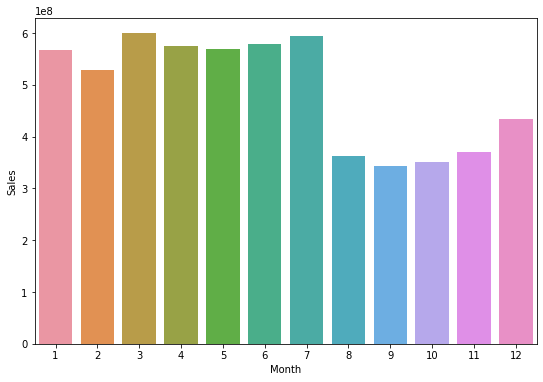

In [28]:
sales_by_month=dataset.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(9,6))
sns.barplot(sales_by_month.Month,sales_by_month.Sales)
plt.show()

March month cumulatively has recorded the highest sales in three years.
Sales are observed to be doing better in the first 7 months of a given year. Or so it appears. Let's have a look at the monthly sales in each year.

In [29]:
#Creating dataframes grouped by month for each year.
Sales_2013=dataset[dataset.Year==2013].groupby('Month')['Sales'].sum().reset_index()
Sales_2014=dataset[dataset.Year==2014].groupby('Month')['Sales'].sum().reset_index()
Sales_2015=dataset[dataset.Year==2015].groupby('Month')['Sales'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


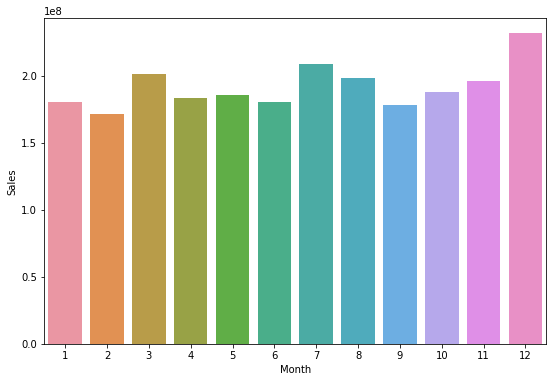

In [30]:
#2013 sales
plt.figure(figsize=(9,6))
sns.barplot(Sales_2013.Month,Sales_2013.Sales)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


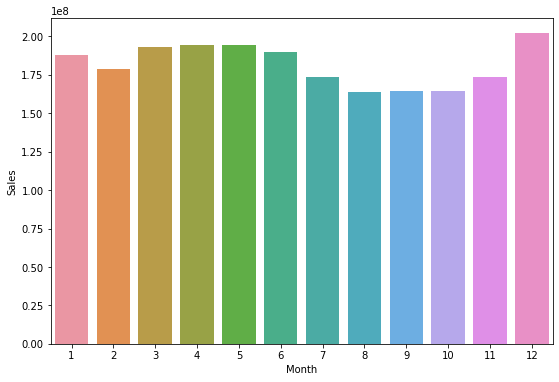

In [31]:
#2014 Sales
plt.figure(figsize=(9,6))
sns.barplot(Sales_2014.Month,Sales_2014.Sales)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


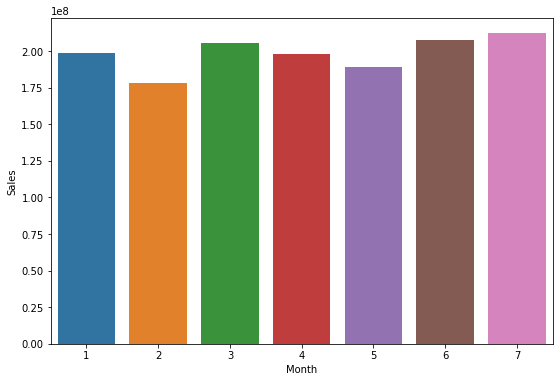

In [32]:
#2015 Sales
plt.figure(figsize=(9,6))
sns.barplot(Sales_2015.Month,Sales_2015.Sales)
plt.show()

So as opposed to our previous conclusions, we can observe that month of december has recorded highest sales in the year 2013, and 2014. 
The reason that the cumulative sales goes down is that we don't have data from Aug 2015 to Dec 2015. 
So we can safely assume that the sales generally tend to grow towards the year end. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


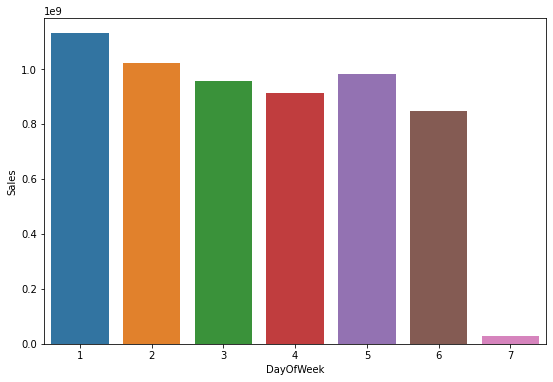

In [33]:
#Let's which day of the week is the busiest
day_of_week_sales=dataset.groupby('DayOfWeek')['Sales'].sum().reset_index()
plt.figure(figsize=(9,6))
sns.barplot(day_of_week_sales.DayOfWeek,day_of_week_sales.Sales)

We can see that the Mondays have generated the most sales, and sundays the least.
Let's confirm if this is a solid pattern, by analysing weekly sales year wise

In [34]:
weekly_sales_2013=dataset[dataset.Year==2013].groupby('DayOfWeek')['Sales'].sum().reset_index()
weekly_sales_2014=dataset[dataset.Year==2014].groupby('DayOfWeek')['Sales'].sum().reset_index()
weekly_sales_2015=dataset[dataset.Year==2015].groupby('DayOfWeek')['Sales'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


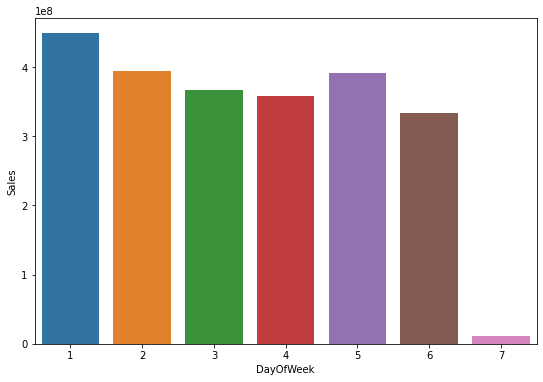

In [35]:
#weekly sales for 2013
plt.figure(figsize=(9,6))
sns.barplot(weekly_sales_2013.DayOfWeek,weekly_sales_2013.Sales)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


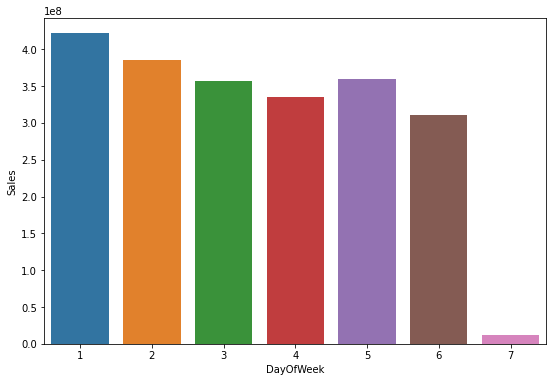

In [ ]:
#weekly sales for 2014
plt.figure(figsize=(9,6))
sns.barplot(weekly_sales_2014.DayOfWeek,weekly_sales_2014.Sales)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


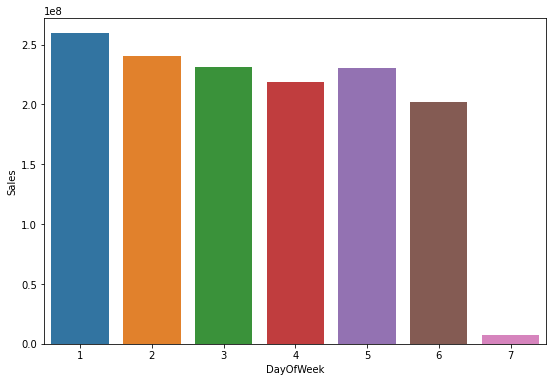

In [ ]:
#weekly sales for 2015
plt.figure(figsize=(9,6))
sns.barplot(weekly_sales_2015.DayOfWeek,weekly_sales_2015.Sales)
plt.show()

We can see that the trend is strong over the years.

There's an interesting pattern to be observed here:
The sales gradually decreases from Monday to Thursday, and is met with a rise on Fridays. It would be interesting to look into the factors that causes this.

In [36]:
#Let's see which store brings in most customers.

dataset.groupby('Store')['Customers'].sum().reset_index().sort_values('Customers',ascending=False)

,Store,Customers
732,733,3206058
261,262,3204694
561,562,2924960
768,769,2902351
1113,1114,2509542
...,...,...
701,702,215970
572,573,208622
253,254,201507
406,407,195715


Store number 733 has the most number of customer visit, and is closely followed by store 262. 

Store number 543 has had least customer traffic.

In [37]:
#Let's look at the days these stores were operational and closed
dataset.groupby('Store')['Open'].sum().reset_index().sort_values('Open',ascending=False)

,Store,Open
768,769,942
1096,1097,942
84,85,942
561,562,942
261,262,942
...,...,...
908,909,607
99,100,606
743,744,605
347,348,597


We now learn that not every store has remained open for same amount of period. Could be due to the fact that these stores are more recent than others.
Also, local holidays would affect these figures too

Let's take a look at the average sales of stores over the number of days they were open. This way we can assess store performance irrespective of how new or old they are.

In [38]:
dataset[dataset.Open==1].groupby('Store')['Sales'].mean().reset_index().sort_values('Sales',ascending=False).rename(columns={'Sales':'Avg Sales'})

,Store,Avg Sales
816,817,21757.483418
261,262,20718.515924
1113,1114,20666.562500
250,251,19123.068036
841,842,18574.795820
...,...,...
840,841,2972.608974
207,208,2936.290816
197,198,2900.604859
542,543,2790.380282


We see that store 817 has the highest average sales per store, closely followed by store 262. 

In [40]:
#Let's see which store runs the most promos
dataset.groupby('Store')['Promo'].sum().reset_index().sort_values('Promo',ascending=False)

,Store,Promo
0,1,360
725,726,360
707,708,360
708,709,360
712,713,360
...,...,...
637,638,286
636,637,286
635,636,286
940,941,286


we can see that most stores have run more or less the same number of promos over the years: 360

In [41]:
dataset.groupby('Month')['Promo'].sum()

Month
1     39025
2     33450
3     42370
4     40140
5     40140
6     36795
7     41145
8     23665
9     22370
10    23305
11    25175
12    20500
Name: Promo, dtype: int64

In [42]:
#Let's look at the promos that most and least successful; 262 and 306 stores have run

print(f" Promos by store 262: {dataset[dataset.Store==262]['Promo'].sum()}")
print(f" Promos by store 306: {dataset[dataset.Store==306]['Promo'].sum()}")

 Promos by store 262: 360
 Promos by store 306: 286


There is a significant difference between the Promos run by these two stores. So we may come to find further down the analysis, that Promotions is significantly correlated to sales.

In [43]:
#Let's look at number of days store were closed and open
Open_close=dataset['Open'].value_counts().reset_index().rename(columns={'index':'Open or Close','Open':'Count'})
Open_close

,Open or Close,Count
0,1,844392
1,0,172817


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


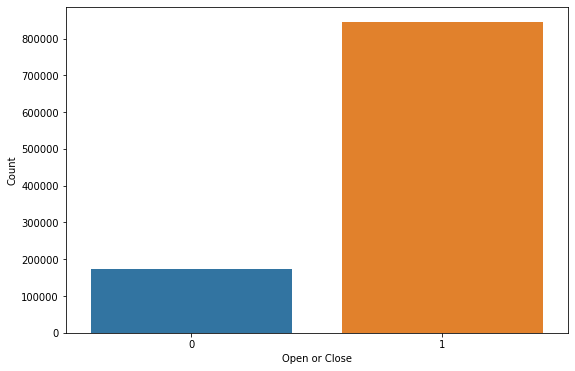

In [44]:
plt.figure(figsize=(9,6))
sns.barplot(Open_close['Open or Close'],Open_close.Count)

As we can see, the number of days, the stores were open were much more than ones they were closed. 

So we may have to discuss if we need to eliminate the column altogether by keeping the records of the days the stores were open.



Let's look into our dependent variable: Sales

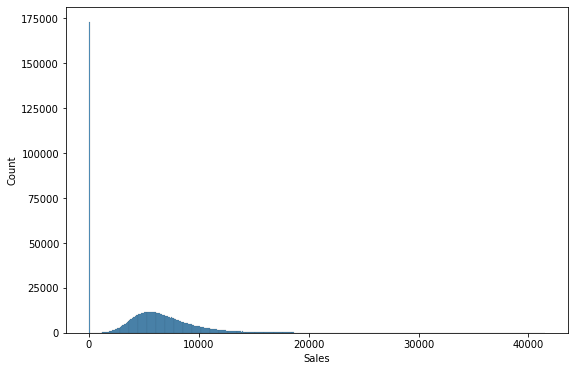

In [46]:
#Let's look at the distribution of our dependent variable first

plt.figure(figsize=(9,6))
sns.histplot(dataset['Sales'])

We see a peak at 0, which is due to days that stores were closed on.

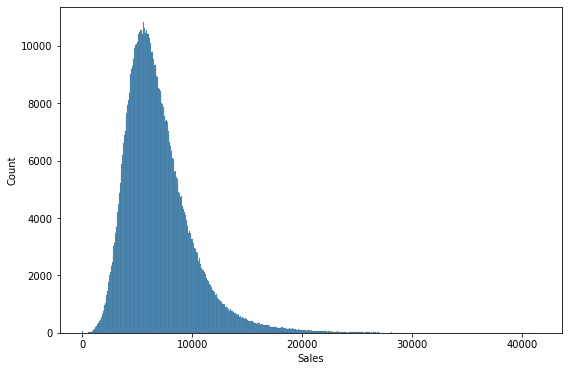

In [47]:
plt.figure(figsize=(9,6))
sns.histplot(dataset[dataset.Open==1]['Sales'])

This looks bit skewed slightly to the right. Square root transformation might help with that.

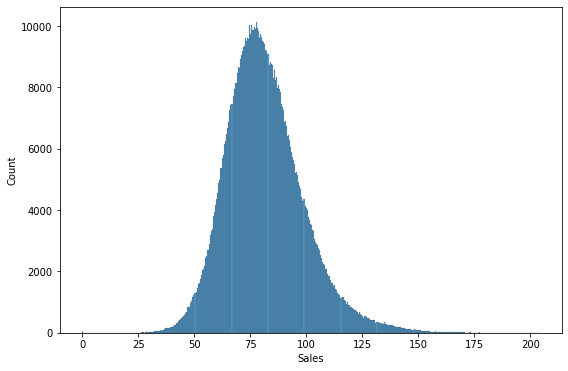

In [49]:
#applying square root transformation
plt.figure(figsize=(9,6))
sns.histplot(np.sqrt(dataset[dataset.Open==1]['Sales']))

This distribution resembles a gaussian one much more closely now. 

Let's look into the correaltion of feature variables with Sales

In [51]:
numerical_features=dataset.describe(include=np.number).columns
numerical_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day'],
      dtype='object')

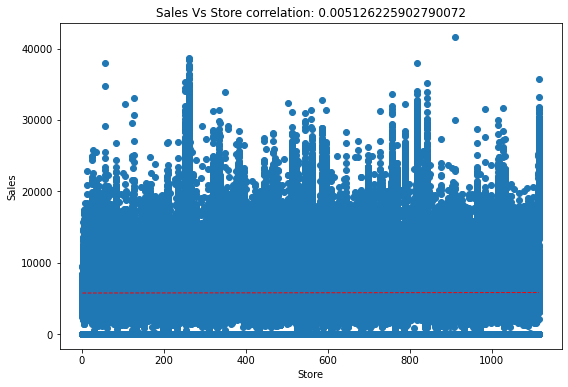

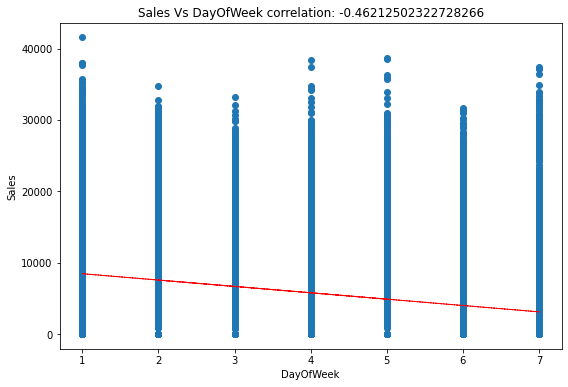

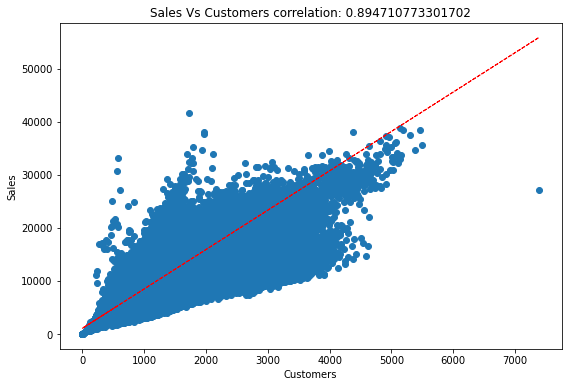

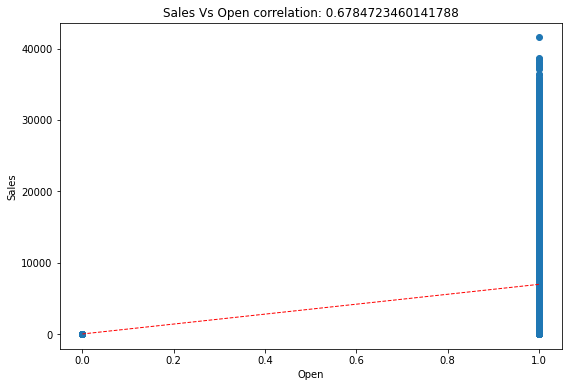

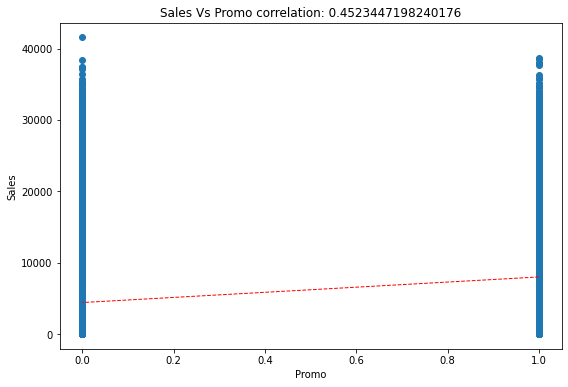

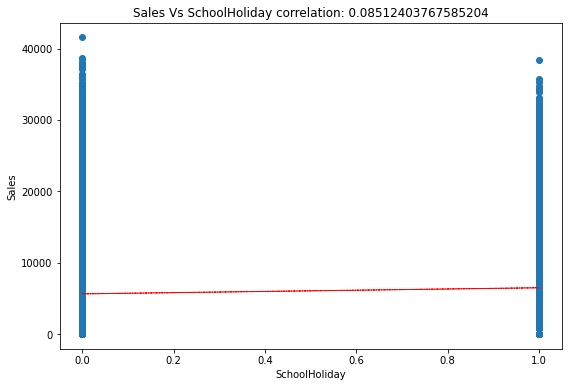

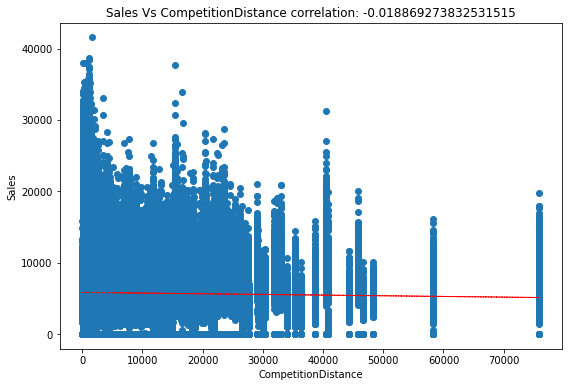

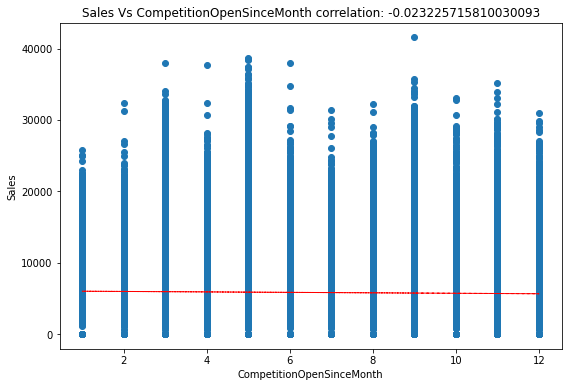

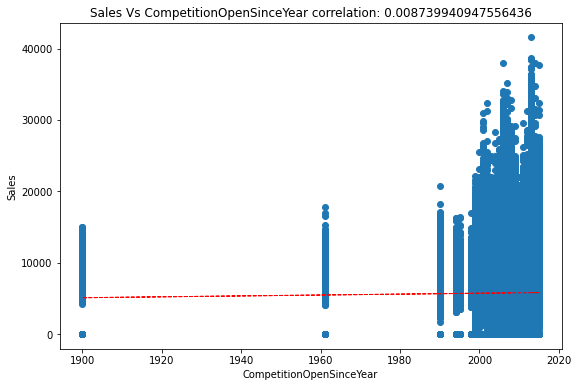

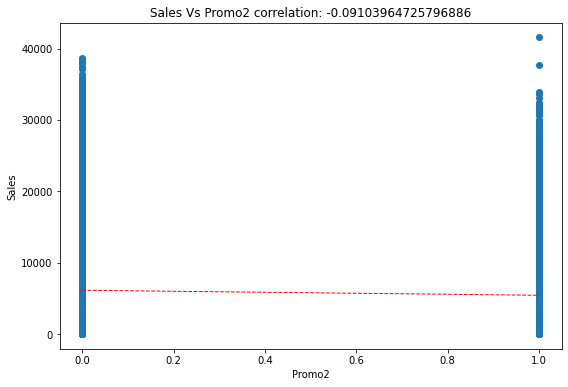

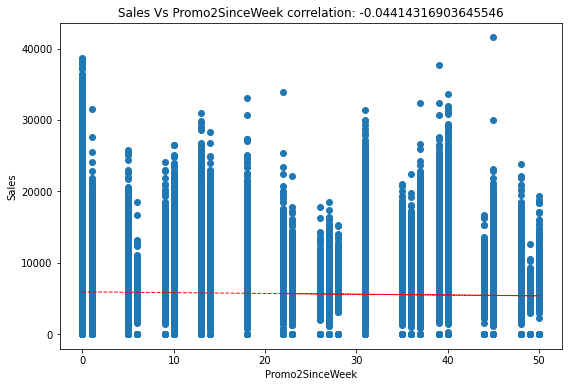

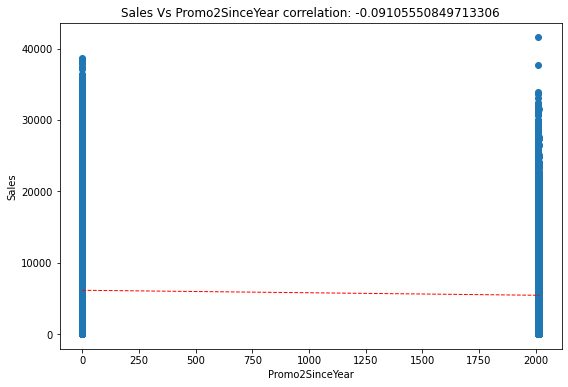

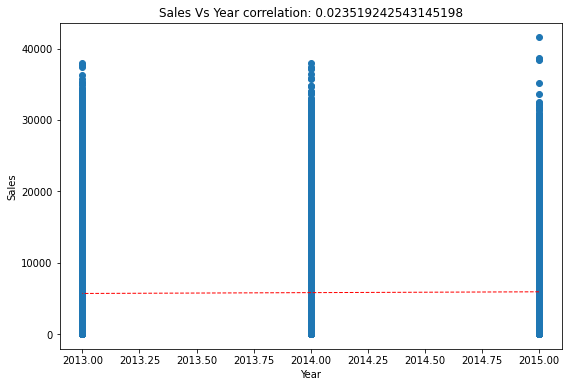

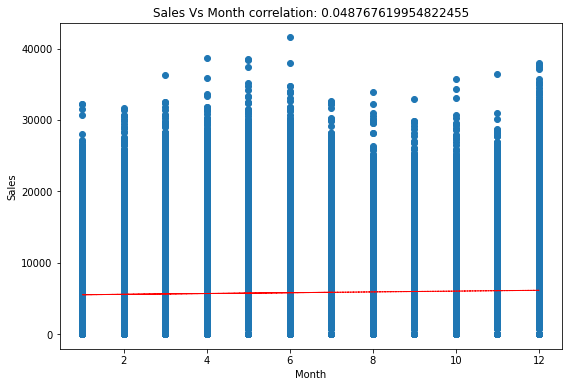

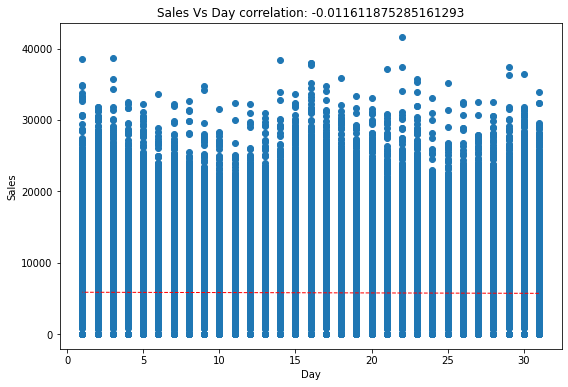

In [54]:
for col in numerical_features:
  if col not in ['Date','StateHoliday','Sales']:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=dataset[col]
    label=dataset['Sales']
    correlation=feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales Vs '+col + ' correlation: ' + str(correlation) )
    z=np.polyfit(feature,label,1)
    y_hat=np.poly1d(z)(dataset[col])

    plt.plot(dataset8[col],y_hat,"r--",lw=1)

  plt.show()





Considerable correlations are observed at:

Sales Vs Customers

Sales Vs DayOfWeek

Salse Vs Promo

In [56]:
#Categorical Features
categorical_features=dataset.describe(exclude=np.number).columns
categorical_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


Index(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [57]:
for col in dataset.describe(include='all'):
  print(f"{col} {dataset[col].dtype} ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


Store int64 
DayOfWeek int64 
Date datetime64[ns] 
Sales int64 
Customers int64 
Open int64 
Promo int64 
StateHoliday object 
SchoolHoliday int64 
StoreType object 
Assortment object 
CompetitionDistance float64 
CompetitionOpenSinceMonth float64 
CompetitionOpenSinceYear float64 
Promo2 int64 
Promo2SinceWeek float64 
Promo2SinceYear float64 
PromoInterval object 
Year int64 
Month int64 
Day int64 


Here, CompetitionSinceMonth, CompetitionSinceYear, Promo2SinceWeek and Promo2SinceYear column have integer values but are represented as float. We can change that.

In [59]:
dataset['CompetitionOpenSinceMonth']=dataset['CompetitionOpenSinceMonth'].astype(int)
dataset['CompetitionOpenSinceYear']=dataset['CompetitionOpenSinceYear'].astype(int)
dataset['Promo2SinceWeek']=dataset['Promo2SinceWeek'].astype(int)
dataset['Promo2SinceYear']=dataset['Promo2SinceYear'].astype(int)


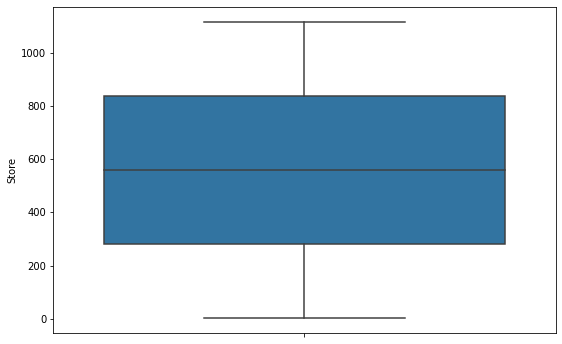

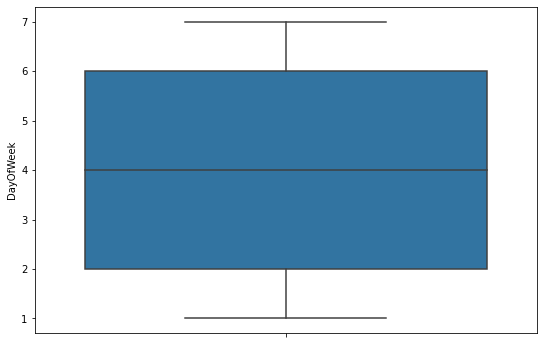

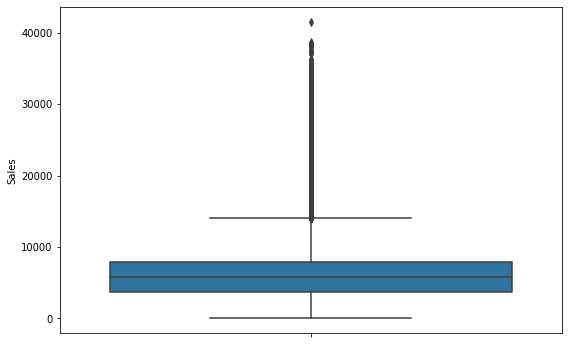

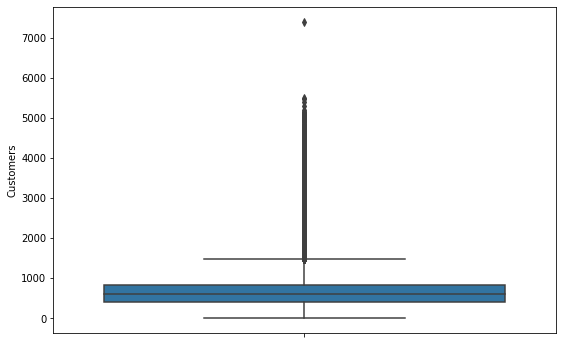

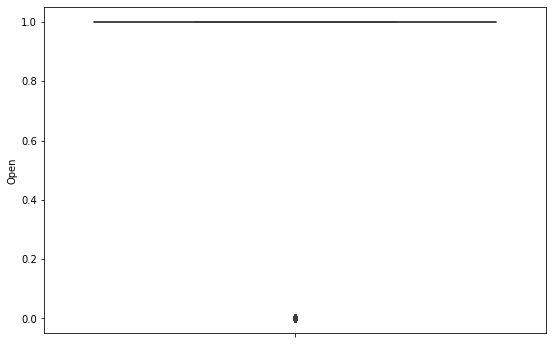

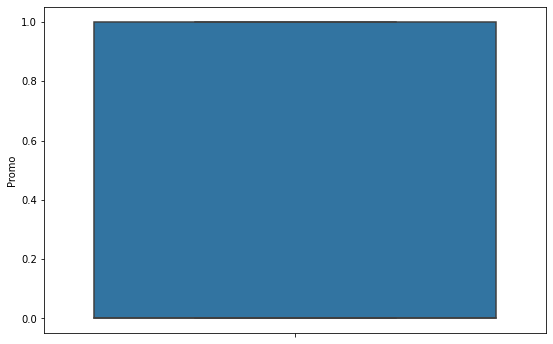

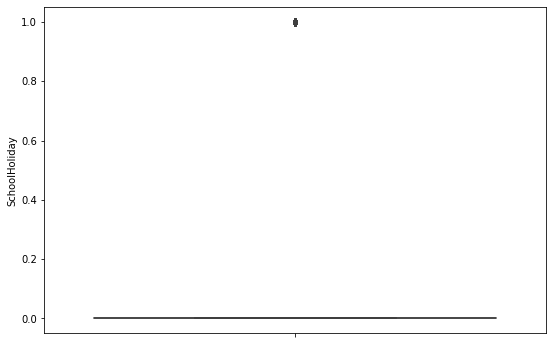

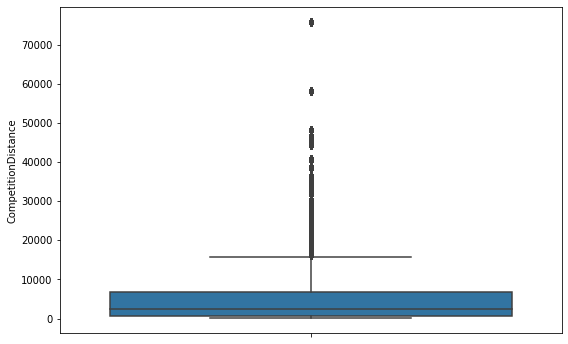

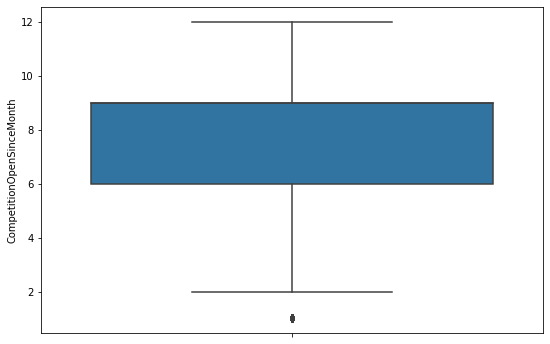

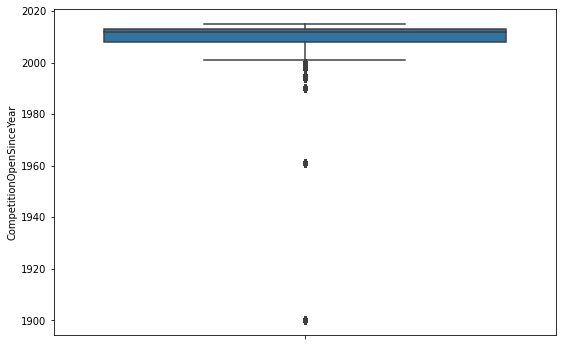

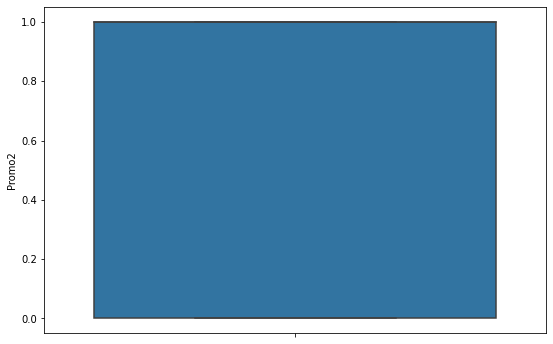

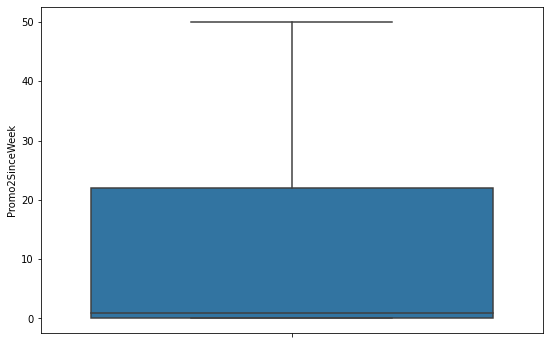

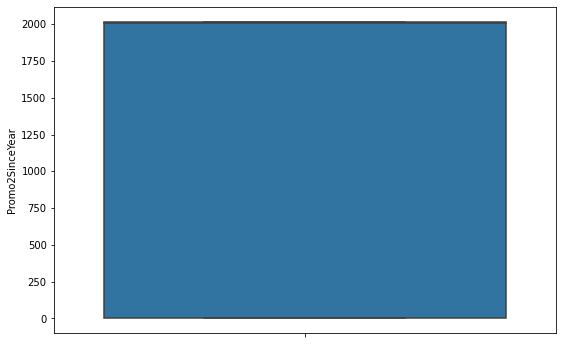

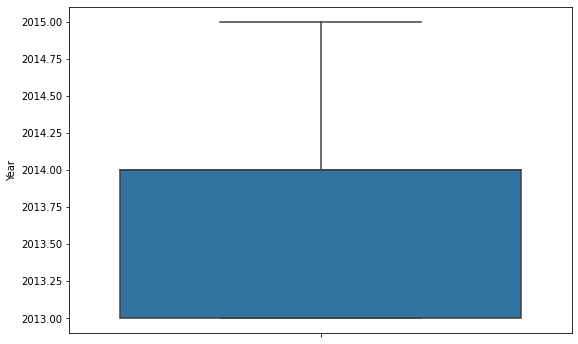

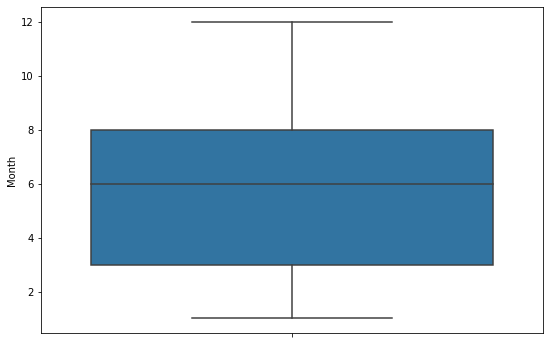

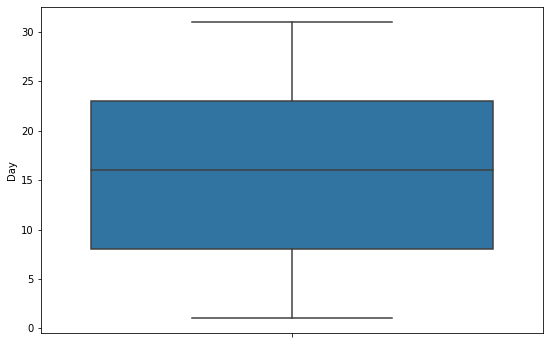

In [61]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  fig=sns.boxplot(y=dataset[col])
  fig.set_title('')
  fig.set_ylabel(col)

  plt.show()

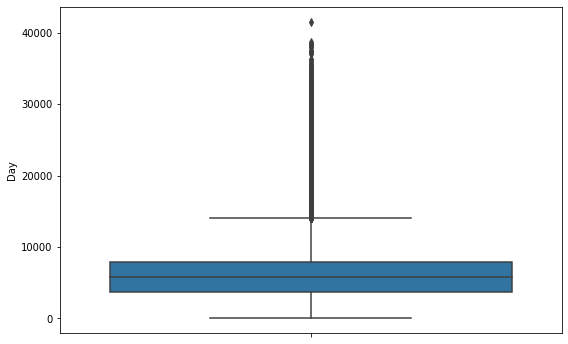

In [63]:
plt.figure(figsize=(9,6))
fig=sns.boxplot(y=dataset['Sales'])
fig.set_title('')
fig.set_ylabel(col)

plt.show()

We have detected presence of outliers in the following columns:

Customers

Competiton Distance

CompetitionOpenSinceMonth

CompetitionOpenSinceYear

And also in our dependant variable Sales

Since regression is quite sensitive to outliers, we need to remove these.

I'll use IQR method to remove outliers here

In [64]:
for col in ['Customers','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Sales']:
  q1=dataset[col].quantile(0.25)
  q3=dataset[col].quantile(0.75)
  iqr=q3-q1
  
  upper_limit=q3+(1.5*iqr)
  lower_limit=q1-(1.5*iqr)

  dataset.loc[(dataset[col] > upper_limit),col] = upper_limit
  dataset.loc[(dataset[col] < lower_limit),col] = lower_limit



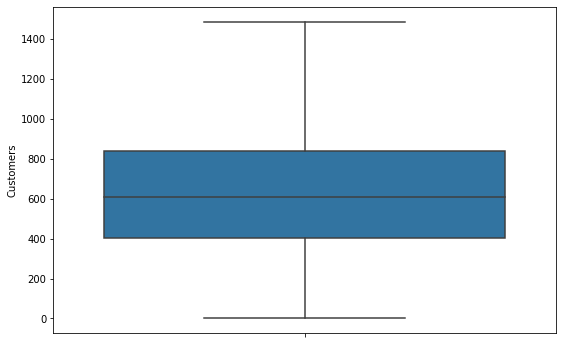

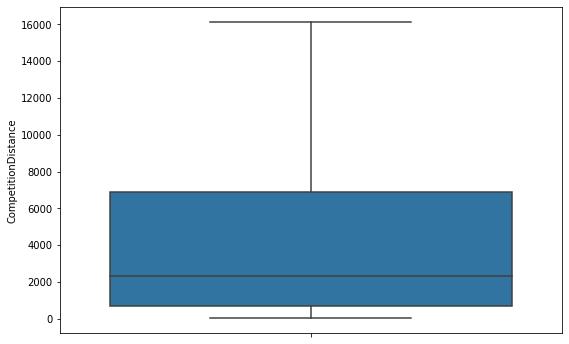

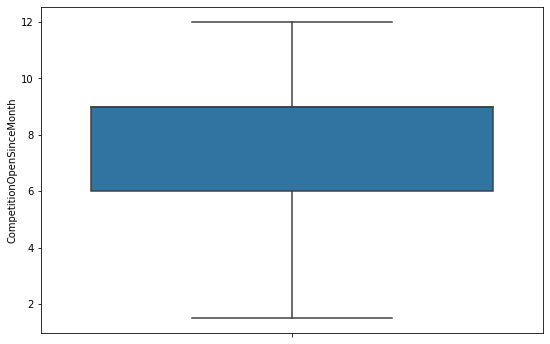

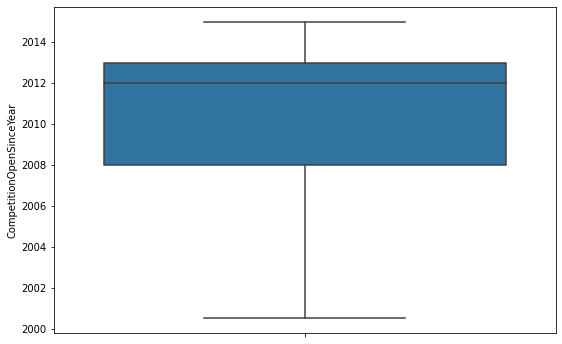

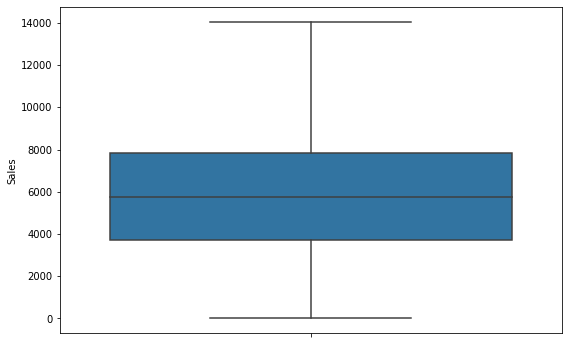

In [65]:
for col in ['Customers','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Sales']:
  plt.figure(figsize=(9,6))
  fig=sns.boxplot(y=dataset[col])
  fig.set_title('')
  fig.set_ylabel(col)

  plt.show()

Our features are free from outliers now

Let's look at multicolinearty

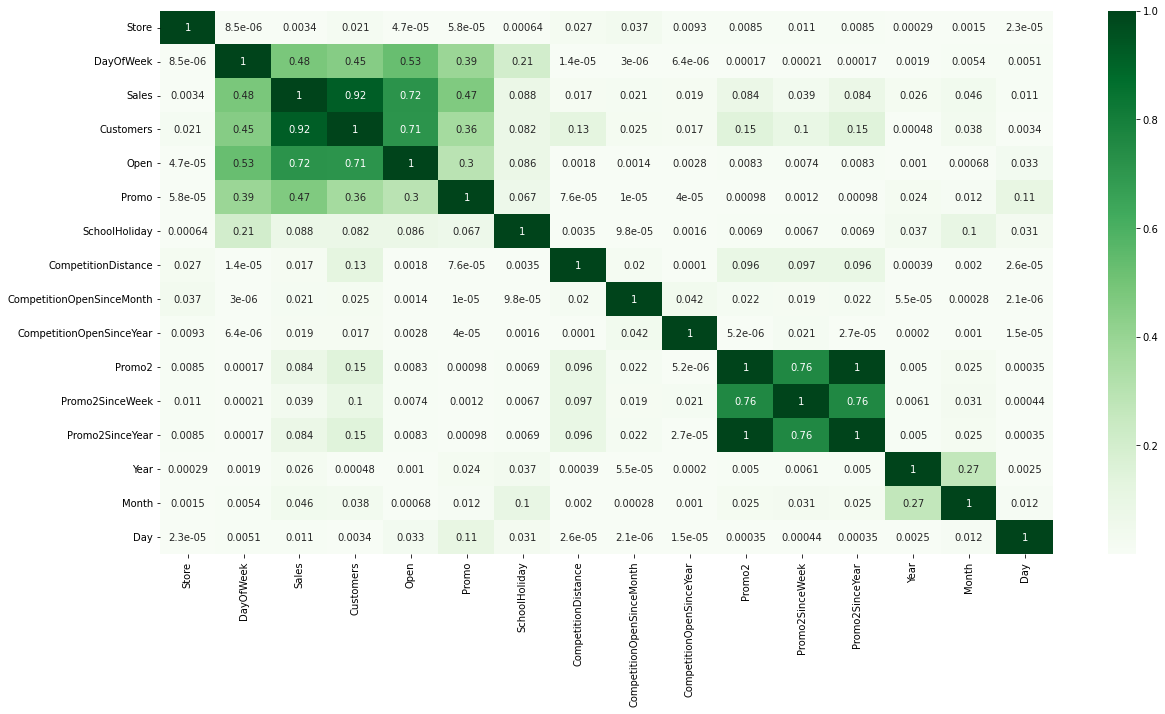

In [67]:
plt.figure(figsize=(20,10))

correlation=dataset.corr()

sns.heatmap(abs(correlation),annot=True,cmap='Greens')

Here we see Promo2 and Promo2SinceYear are entirely correlated with each other, and have similar correaltion with Sales. Hence we can remove one of these 2.

Similary Promo2SinceYear and Promo2SinceWeek has high collinearity. One of them needs to go as well. 

So we should probably keep Promo2SinceYear and eliminate promo2 and promo2sinceweek.

Let's look into VIF of feature variables, and seek assistance at removing features.

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Sales','Promo2SinceWeek','Promo2']  ] ] )

,variables,VIF
0,Store,4.021385
1,DayOfWeek,7.899965
2,Customers,8.194109
3,Open,13.967982
4,Promo,2.055791
5,SchoolHoliday,1.287520
6,CompetitionDistance,1.906547
7,CompetitionOpenSinceMonth,8.998854
8,CompetitionOpenSinceYear,259692.676347
9,Promo2SinceYear,2.133706


I'll aim to bring down VIF factors below 5 for each features.

We see that CompetitionOpenSinceYear and Year column has high VIF. Let's remove the feature with lower corelation with Sales.

Let's remove CompetitionSinceMonth owing to its low corelation to Sales

In [72]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Sales','Promo2SinceWeek','Promo2','CompetitionOpenSinceYear']  ] ] )

,variables,VIF
0,Store,4.020972
1,DayOfWeek,7.899917
2,Customers,8.189957
3,Open,13.966288
4,Promo,2.055607
5,SchoolHoliday,1.287506
6,CompetitionDistance,1.906482
7,CompetitionOpenSinceMonth,8.982143
8,Promo2SinceYear,2.133611
9,Year,42.376535


Removing Year field

In [73]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Sales','Promo2SinceWeek','Promo2','CompetitionOpenSinceYear','Year']  ] ] )

,variables,VIF
0,Store,3.700056
1,DayOfWeek,4.773609
2,Customers,8.111782
3,Open,12.103851
4,Promo,1.966359
5,SchoolHoliday,1.268819
6,CompetitionDistance,1.841080
7,CompetitionOpenSinceMonth,7.200435
8,Promo2SinceYear,2.058110
9,Month,3.875189


Since CompetitionOpenSinceMonth has low correaltion with Sales and has VIF above 5, let's remove that as well

In [74]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Sales','Promo2SinceWeek','Promo2','CompetitionOpenSinceYear','Year','CompetitionOpenSinceMonth']  ] ] )

,variables,VIF
0,Store,3.660366
1,DayOfWeek,4.007767
2,Customers,8.111422
3,Open,11.487749
4,Promo,1.940491
5,SchoolHoliday,1.264141
6,CompetitionDistance,1.833697
7,Promo2SinceYear,2.034262
8,Month,3.804044
9,Day,3.886655


Looks good now. The features present here aren't much correalated to each other.

In [78]:
features=['Store','DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','Promo2SinceYear','Month','Day','Open']

In [77]:
# One hot encoding
dataset = pd.get_dummies(dataset, columns=['StateHoliday','StoreType','Assortment'], prefix=["StateH", "S_Type","Assortment"])

In [79]:
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 'StateH_0',
       'StateH_0', 'StateH_a', 'StateH_b', 'StateH_c', 'S_Type_a', 'S_Type_b',
       'S_Type_c', 'S_Type_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [84]:
categorical_features=dataset.describe(exclude=np.number).columns
categorical_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


Index(['Date', 'PromoInterval'], dtype='object')

In [113]:
features=['Store','DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','Promo2SinceYear','Month','Day','Open', 'StateH_0',
       'StateH_0', 'StateH_a', 'StateH_b', 'StateH_c', 'S_Type_a', 'S_Type_b',
       'S_Type_c', 'S_Type_d', 'Assortment_a', 'Assortment_b', 'Assortment_c']

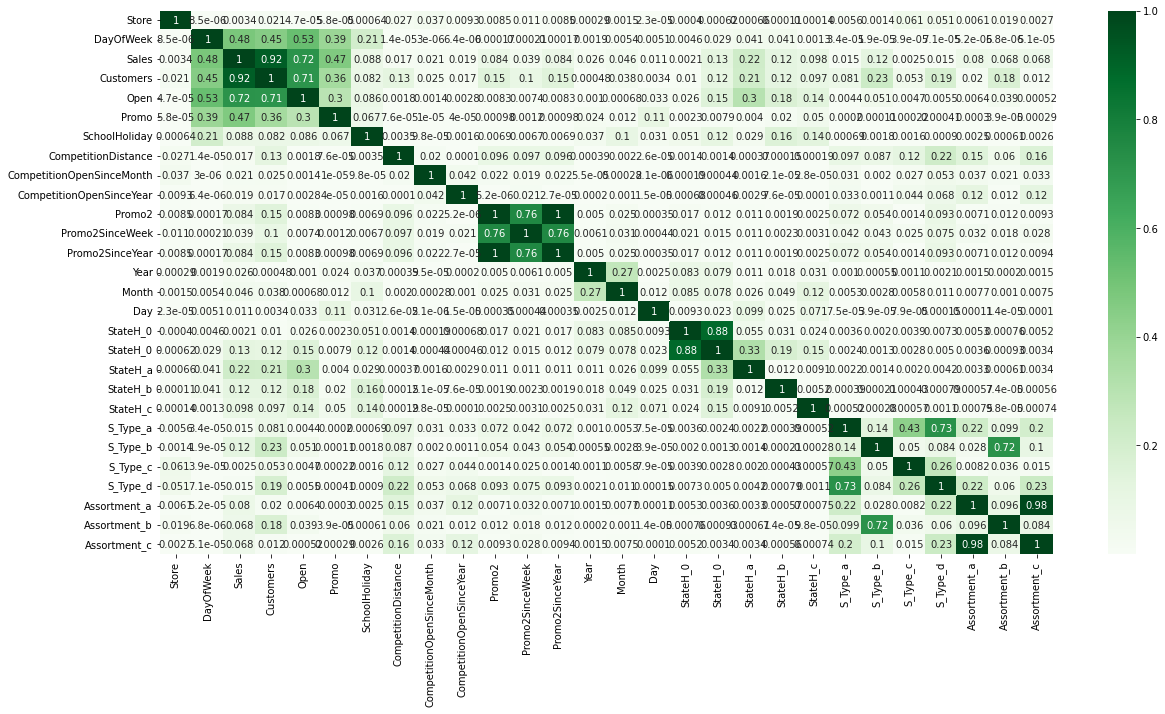

In [114]:
plt.figure(figsize=(20,10))

correlation=dataset.corr()

sns.heatmap(abs(correlation),annot=True,cmap='Greens')

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X=dataset[features]
Y=np.sqrt(dataset['Sales'])

In [117]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [118]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)

In [119]:
reg.score(x_train,y_train)

0.9640688994450465

In [120]:
y_pred=reg.predict(x_test)

In [121]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test)**2,(y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1155236.9516049617
RMSE : 1074.8194972203294


In [122]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.9104446096468597
Adjusted R2 :  0.910437565852352


Lasso

In [123]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [124]:
lasso.score(x_train, y_train)

0.9626579839295021

In [125]:
y_pred_l = lasso.predict(x_test)

In [126]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_l)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_l)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 3.68807890446107e+256
RMSE : 1.9204371649343463e+128
R2 : 0.9069815878830134
Adjusted R2 :  0.9069742717116719
